In [27]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Load the dataset
data = pd.read_csv('calenviroscreen-3.0-results-june-2018-update.csv')
data.columns = data.columns.str.strip()
data.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),...,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),...,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),...,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),...,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),...,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76


In [29]:
print(data.columns)

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', 'CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', '

In [30]:
columns_to_drop = ['CES 3.0 Percentile', 'CES 3.0 \nPercentile Range', 'Ozone Pctl', 'PM2.5 Pctl', 'Diesel PM Pctl', 'Drinking Water Pctl', 'Pesticides Pctl', 'Tox. Release Pctl', 'Traffic Pctl', 'Cleanup Sites Pctl', 'Groundwater Threats Pctl', 'Haz. Waste Pctl', 'Imp. Water Bodies Pctl', 'Solid Waste Pctl', 'Pollution Burden', 'Pollution Burden Pctl', 'Asthma Pctl', 'Low Birth Weight Pctl', 'Cardiovascular Disease Pctl', 'Education Pctl', 'Linguistic Isolation Pctl', 'Poverty Pctl', 'Unemployment Pctl', 'Housing Burden Pctl', 'Pop. Char.', 'Pop. Char. Pctl']

data = data.drop(columns=columns_to_drop)

data.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,SB 535 Disadvantaged Community,Ozone,...,Pollution Burden Score,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden,Pop. Char. Score
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,Yes,0.065,...,9.85,131.64,7.44,14.13,53.3,16.2,76.3,17.6,26.0,9.55
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,Yes,0.062,...,10.00,60.66,7.04,12.94,53.3,33.4,72.5,12.3,34.1,9.07
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,Yes,0.062,...,8.76,142.12,10.16,14.96,42.3,16.7,86.8,16.1,40.1,9.81
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,Yes,0.046,...,9.17,142.17,6.23,14.72,40.8,15.3,61.3,19.6,21.1,8.99
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,Yes,0.065,...,9.88,90.48,4.50,12.82,45.1,14.7,66.4,18.6,28.1,8.30


In [33]:
# Exclude non-numeric columns from correlation matrix calculation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

In [35]:
numeric_data.isnull().sum()

Census Tract                0
Total Population            0
ZIP                         0
Longitude                   0
Latitude                    0
CES 3.0 Score             106
Ozone                       0
PM2.5                      19
Diesel PM                   0
Drinking Water             18
Pesticides                  0
Tox. Release                0
Traffic                    56
Cleanup Sites               0
Groundwater Threats         0
Haz. Waste                  0
Imp. Water Bodies           0
Solid Waste                 0
Pollution Burden Score      0
Asthma                      0
Low Birth Weight          222
Cardiovascular Disease      0
Education                  96
Linguistic Isolation      242
Poverty                    79
Unemployment              155
Housing Burden            157
Pop. Char. Score          106
dtype: int64

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the pipeline
pipeline = Pipeline([
    # Step 1: Impute missing values with mean for numeric columns
    ('imputer_numeric', SimpleImputer(strategy='mean')),
])

# List of numeric columns with missing values
numeric_columns_with_missing = [
    'CES 3.0 Score', 'PM2.5', 'Drinking Water', 'Traffic', 'Low Birth Weight',
    'Education', 'Linguistic Isolation','Poverty', 'Unemployment',
    'Housing Burden','Pop. Char. Score'
]

# Fit the pipeline to the data
pipeline.fit(numeric_data[numeric_columns_with_missing])#

# Transform the data
data_transformed = pipeline.transform(numeric_data[numeric_columns_with_missing])

# Convert the transformed data back to DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=numeric_columns_with_missing)

# Replace the original columns with the transformed columns in the original DataFrame
numeric_data[numeric_columns_with_missing] = data_transformed_df

# Check if there are any missing values left
print(numeric_data.isnull().sum())


Census Tract              0
Total Population          0
ZIP                       0
Longitude                 0
Latitude                  0
CES 3.0 Score             0
Ozone                     0
PM2.5                     0
Diesel PM                 0
Drinking Water            0
Pesticides                0
Tox. Release              0
Traffic                   0
Cleanup Sites             0
Groundwater Threats       0
Haz. Waste                0
Imp. Water Bodies         0
Solid Waste               0
Pollution Burden Score    0
Asthma                    0
Low Birth Weight          0
Cardiovascular Disease    0
Education                 0
Linguistic Isolation      0
Poverty                   0
Unemployment              0
Housing Burden            0
Pop. Char. Score          0
dtype: int64


In [85]:
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


                        Census Tract  Total Population       ZIP  Longitude  \
Census Tract                1.000000          0.092702  0.108162  -0.049371   
Total Population            0.092702          1.000000  0.068548   0.044482   
ZIP                         0.108162          0.068548  1.000000  -0.389320   
Longitude                  -0.049371          0.044482 -0.389320   1.000000   
Latitude                    0.042883         -0.036000  0.428458  -0.926705   
CES 3.0 Score              -0.187310          0.043251 -0.149865   0.239795   
Ozone                      -0.041672          0.081119 -0.122336   0.581215   
PM2.5                      -0.156067          0.049385 -0.187019   0.384503   
Diesel PM                  -0.169529         -0.092283 -0.076206  -0.029428   
Drinking Water              0.075888          0.068659 -0.095171   0.291556   
Pesticides                  0.105101          0.025154  0.028884  -0.038766   
Tox. Release               -0.058856          0.0261

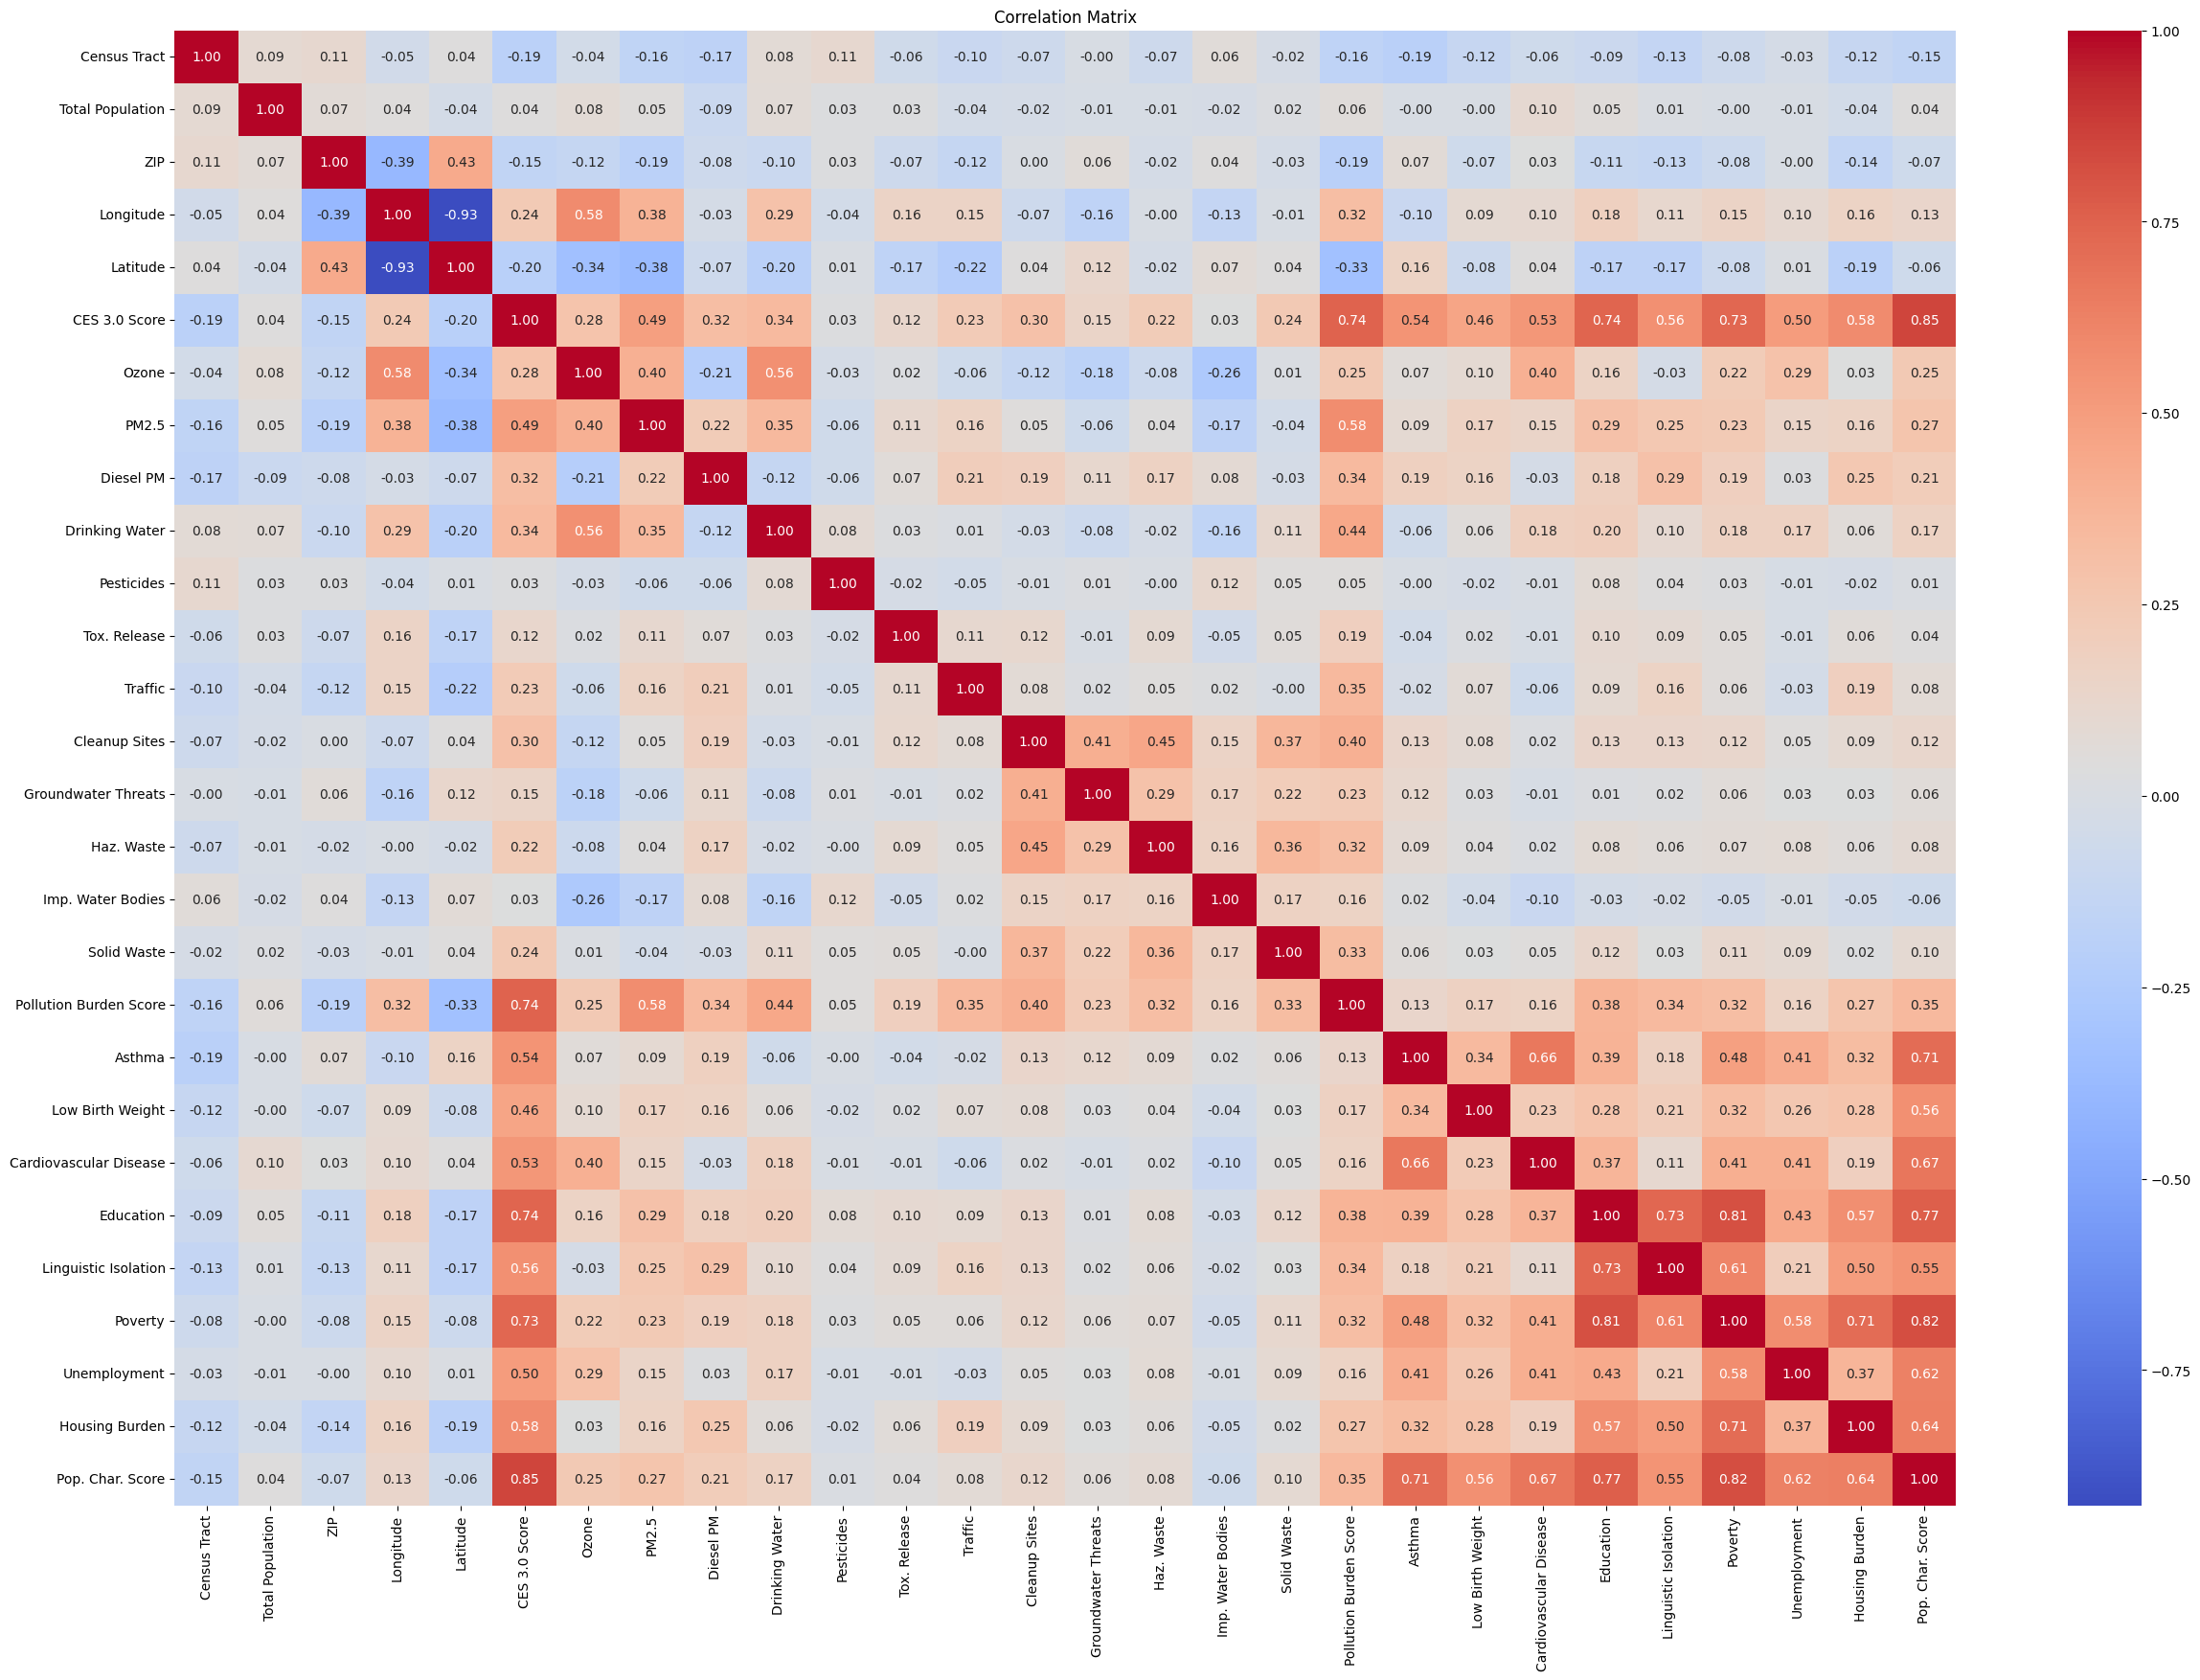

In [86]:
# Heatmap for visualization of correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [87]:
# Select the top 10 features highly correlated with CES 3.0
top_10_features = correlation_matrix['CES 3.0 Score'].sort_values(ascending=False)[1:11]

# Print the top 10 features
print(top_10_features)


Pop. Char. Score          0.852999
Pollution Burden Score    0.744379
Education                 0.742317
Poverty                   0.729445
Housing Burden            0.580420
Linguistic Isolation      0.560434
Asthma                    0.541967
Cardiovascular Disease    0.528558
Unemployment              0.504181
PM2.5                     0.491582
Name: CES 3.0 Score, dtype: float64


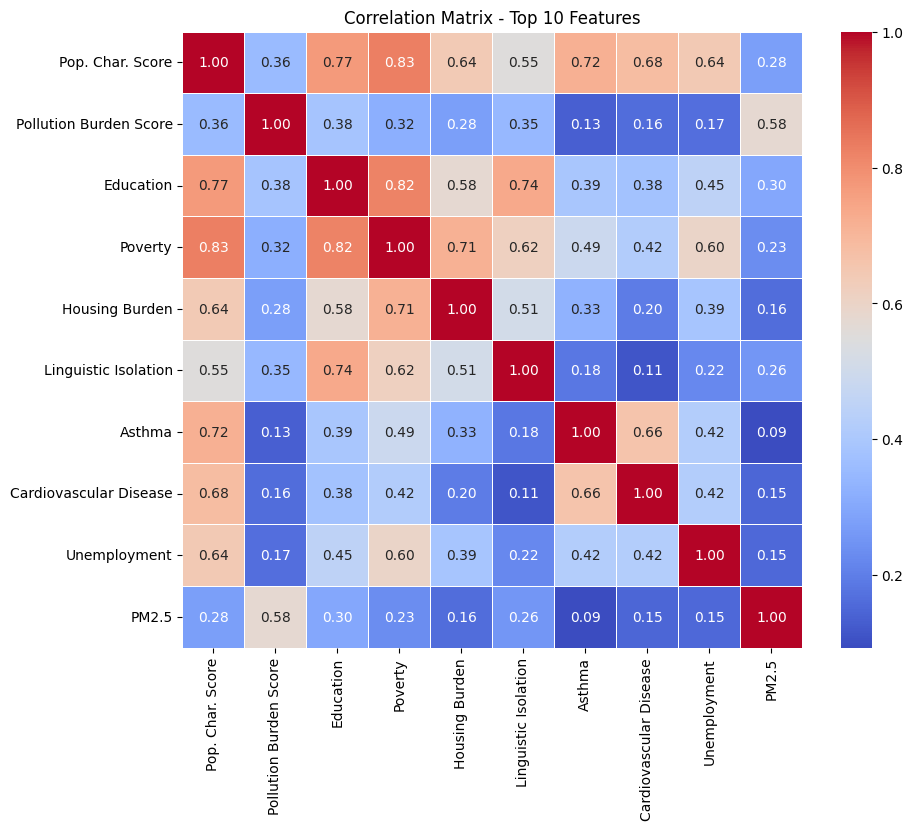

In [88]:
# Assuming you have a DataFrame called data with the top 10 features
top_10_features = ['Pop. Char. Score', 'Pollution Burden Score', 'Education', 'Poverty', 'Housing Burden',
                   'Linguistic Isolation', 'Asthma', 'Cardiovascular Disease', 'Unemployment', 'PM2.5']
correlation_matrix = data[top_10_features].corr()


import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with the top 10 features
top_10_features = ['Pop. Char. Score', 'Pollution Burden Score', 'Education', 'Poverty', 'Housing Burden',
                   'Linguistic Isolation', 'Asthma', 'Cardiovascular Disease', 'Unemployment', 'PM2.5']
correlation_matrix = data[top_10_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Top 10 Features')
plt.show()

In [89]:
final_features=[]

# Select the top 10 features
top_10_features = ['Pop. Char. Score', 'Pollution Burden Score', 'Education', 'Poverty', 'Housing Burden',
                   'Linguistic Isolation', 'Asthma', 'Cardiovascular Disease', 'Unemployment', 'PM2.5']

# Create a subset of the correlation matrix with only the top 10 features
top_10_corr_matrix = correlation_matrix[top_10_features]

# Find highly correlated features
highly_correlated_features = set()
for feature_i in top_10_features:
    for feature_j in top_10_features:
        if feature_i != feature_j:
            correlation = top_10_corr_matrix.loc[feature_i, feature_j]
            if abs(correlation) > 0.7:  # Adjust the threshold as needed
                top_10_features.remove(feature_j)

# Drop one feature from highly correlated features
if len(highly_correlated_features) > 0:
    feature_to_drop = highly_correlated_features.pop()
    top_10_features.remove(feature_to_drop)

# Print the remaining top features after dropping highly correlated feature and add them to final_features list
print("Remaining top features after dropping highly correlated feature:")
for feature in top_10_features:
    final_features.append(feature)
    print(feature)




Remaining top features after dropping highly correlated feature:
Pollution Burden Score
Poverty
Linguistic Isolation
Cardiovascular Disease
Unemployment
PM2.5
